First, we construct the series step-by-step starting from just the number $3$.
$$
\begin{align}
0&: 3 \\
1&: 3332 \\
2&: 333233323332332 \\
3&: 33323332333233233323332333233233323332333233233323332332
\end{align}
$$

To determine the sequence of step $x$, we expand step $x-1$ with the mapping $3 \rightarrow 3332$ and $2 \rightarrow 332$. We then define two quantities: $n_2[x]$, the number of $2$s in step $x$, and $n_3[x]$, the number of $3$s in step $x$. The first couple of values for $n_2[x]$ and $n_3[x]$ are:

| $x$ | $n_2[x]$ | $n_3[x]$ |
|-----|----------|----------|
| 0   | 0        | 1        |
| 1   | 1        | 3        |
| 2   | 4        | 11       |
| 3   | 15       | 41       |
| 4   | 56       | 153      |

There is a simple recursive expression for these functions. Specifically:

$$
\begin{align}
n_2[x] &= n_2[x-1] + n_3[x-1] \\
n_3[x] &= 3 n_3[x-1] + 2 n_2[x-1] \\
n_2[0] &= 0 \\
n_3[0] &= 1
\end{align}
$$

These expressions can be rewritten such that $n_2[x]$ is a recursive function of only $n_2[x]$ and $n_3[x]$ is a recursive function of only $n_3[x]$. First, we look at $n_2[x]$:

$$
\begin{align}
n_2[x] &= n_2[x-1] + n_3[x-1] \\
&= n_2[x-1] + 2 n_2[x-2] + 3 n_3[x-2] \\
&= n_2[x-1] + 2 n_2[x-2] + 6 n_2[x-3] + 18 n_2[x-4] + \dots \\
n_2[x-1] &= n_2[x-2] + 2 n_2[x-3] + 6 n_2[x-4] + \dots \\
3 n_2[x-1] &= 3 n_2[x-2] + 6 n_2[x-3] + 18 n_2[x-4] + \dots \\
n_2[x] - 3 n_2[x-1] &= n_2[x-1] - n_2[x-2] \\
n_2[x] &= 4 n_2[x-1] - n_2[x-2] \\
n_2[0] &= 0 \\
n_2[1] &= 1
\end{align}
$$

Because the resulting expression is double-recursive, two boundary conditions must be supplied.

Now, for $n_3[x]$:

$$
\begin{align}
n_3[x] &= 3 n_3[x-1] + 2 n_2[x-1] \\
&= 3 n_3[x-1] + 2 n_3[x-2] + 2 n_2[x-2] \\
&= 3 n_3[x-1] + 2 \left(n_3[x-2] + n_3[x-3] + n_3[x-4] + \dots\right) \\
n_3[x-1] &= 3 n_3[x-2] + 2 \left(n_3[x-3] + n_3[x-4] + \dots\right) \\
n_3[x] - n_3[x-1] &= 3 n_3[x-1] - n_3[x-2] \\
n_3[x] &= 4 n_3[x-1] - n_3[x-2] \\
n_3[0] &= 1 \\
n_3[1] &= 3
\end{align}
$$

Note that the recursive expressions for $n_2[x]$ and $n_3[x]$ are the same, with only the boundary conditions differing! By recursively inserting the expression for $n_3[x]$ itself, we can arrive at a series of equivalent expressions:

$$
\begin{align}
n_3[x] &= 4 n_3[x-1] - n_3[x-2] \\
&= 15 n_3[x-2] - 4 n_3[x-3] \\
&= 56 n_3[x-3] - 15 n_3[x-4]
\end{align}
$$

Notice that the coefficients are exactly the values of $n_2[x]$! This relationship can also be written as:

$$n_3[x] = n_2[y] n_3[x - y + 1] - n_2[y - 1] n_3[x - y]$$

For all $1 <= y <= x$. For example, take $y = x$:

$$n_3[x] = n_2[x] n_3[1] - n_2[x - 1] n_3[0]$$

Then the ratio between the number of $3$s and the number of $2$s can be written as:

$$
\begin{align}
\frac{n_3[x]}{n_2[x]} &= \frac{n_2[x] n_3[1] - n_2[x-1] n_3[0]}{n_2[x]} \\
&= n_3[1] - \frac{n_2[x-1]}{n_2[x]} n_3[0] \\
&= 3 - \frac{n_2[x-1]}{n_2[x]} \\
&= 3 - \frac{n_2[x-1]}{4 n_2[x-1] - n_2[x-2]} \\
&= 3 - \frac{1}{4 - \frac{n_2[x-2]}{n_2[x-1]}} \\
&= 3 - \frac{1}{4 - \frac{1}{4 - \frac{1}{4 - \dots}}}
\end{align}
$$

In the limit of large $x$, the final term in the previous expression becomes an infinite continued fraction. The numerical value of this can be solved for simply:

$$
\begin{align}
Z &= \frac{1}{4 - \frac{1}{4 - \frac{1}{4 - \dots}}} \\
&= \frac{1}{4 - Z} \\
0 &= -Z^2 + 4Z - 1 \\
Z &= 2 - \sqrt{3}
\end{align}
$$

The quadratic equation obtained above has two solutions, but since we know that $Z$ must be less than 1 (as it is equal to 1 divided by a value that is greater than 1), we only take the solution that is less than 1. Therefore, finally, we obtain:

$$\lim_{x \rightarrow \infty} \frac{n_3[x]}{n_2[x]} = 1 + \sqrt{3}$$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache

def n_gen(n0, n1):
    @lru_cache(maxsize=None)
    def n(x):
        if x == 0:
            return n0
        if x == 1:
            return n1
        return 4*n(x-1) - n(x-2)
    return n

n2 = n_gen(0, 1)
n3 = n_gen(1, 3)

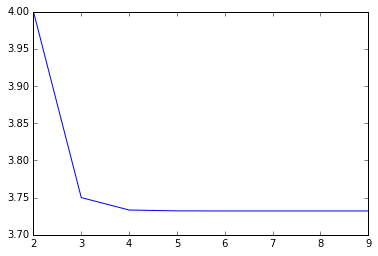

In [9]:
x = np.arange(2, 10)
plt.plot(x, [n2(xi)/n2(xi-1) for xi in x])